In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

20
-2.48095629900532
0.023401222014992666


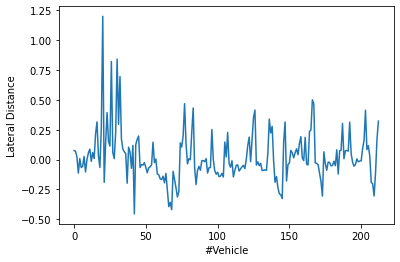

In [80]:
import numpy as np

label_path = 'evaluation(_855)완성.txt'
vehicleList = []
estimationList = []
answerList = []
with open(label_path, encoding='utf-8') as f:
    lines = f.readlines()
    del lines[:1] # exclude the title of elements
    for ii, line in enumerate(lines):
        label = line.strip().split(' ')
        vehicleList.append(ii+1)
        a = float(label[-2])
        estimationList.append(float(label[-2]))
        answerList.append(float(label[-1]))
#print(vehicleList)
#print(estimationList)
#print(answerList)

for ii, a in enumerate(estimationList):
    if estimationList[ii]-answerList[ii] < -1:
        print(ii)
        print(estimationList[ii])

estimationArray = np.array(estimationList)
#estimationArray = np.abs(estimationList)
answerArray = np.array(answerList)
#answerArray = np.abs(answerList)
newArray = answerArray - estimationArray
newList = list(newArray)
print(np.mean(newArray))

#plt.plot(vehicleList, estimationList, 'g',
#        vehicleList, answerList, 'r')
plt.plot(newList)

plt.xlabel('#Vehicle')
plt.ylabel("Lateral Distance")

plt.show()

In [55]:
import statistics

print("Standard Deviation of sample is %s" % statistics.stdev(answerList))

Standard Deviation of sample is 5.551495811434617
